<a href="https://colab.research.google.com/github/prachikane/CS6375-Fall2022-Final-Project/blob/main/breast_cancer_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast cancer diagnosis using Machine learning

##Data preprocessing and visualization

In [ ]:
#library import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sklearn.metrics as skm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
#reading the dataset and printing it's size
#the csv uploaded will delete after every runtime so we need to upload it everytime
data = pd.read_csv('breast-cancer.csv')
print("Dimentions of the breast cancer dataset:",data.shape)
#printing the top 5 rows of the dataset
data.head()

Dimentions of the breast cancer dataset: (569, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
#this prints the total number of benign and malign samples available in the dataset
data.groupby('diagnosis').size()
#This function returns the number of missing values in the dataset 
data.isnull().sum()
data.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

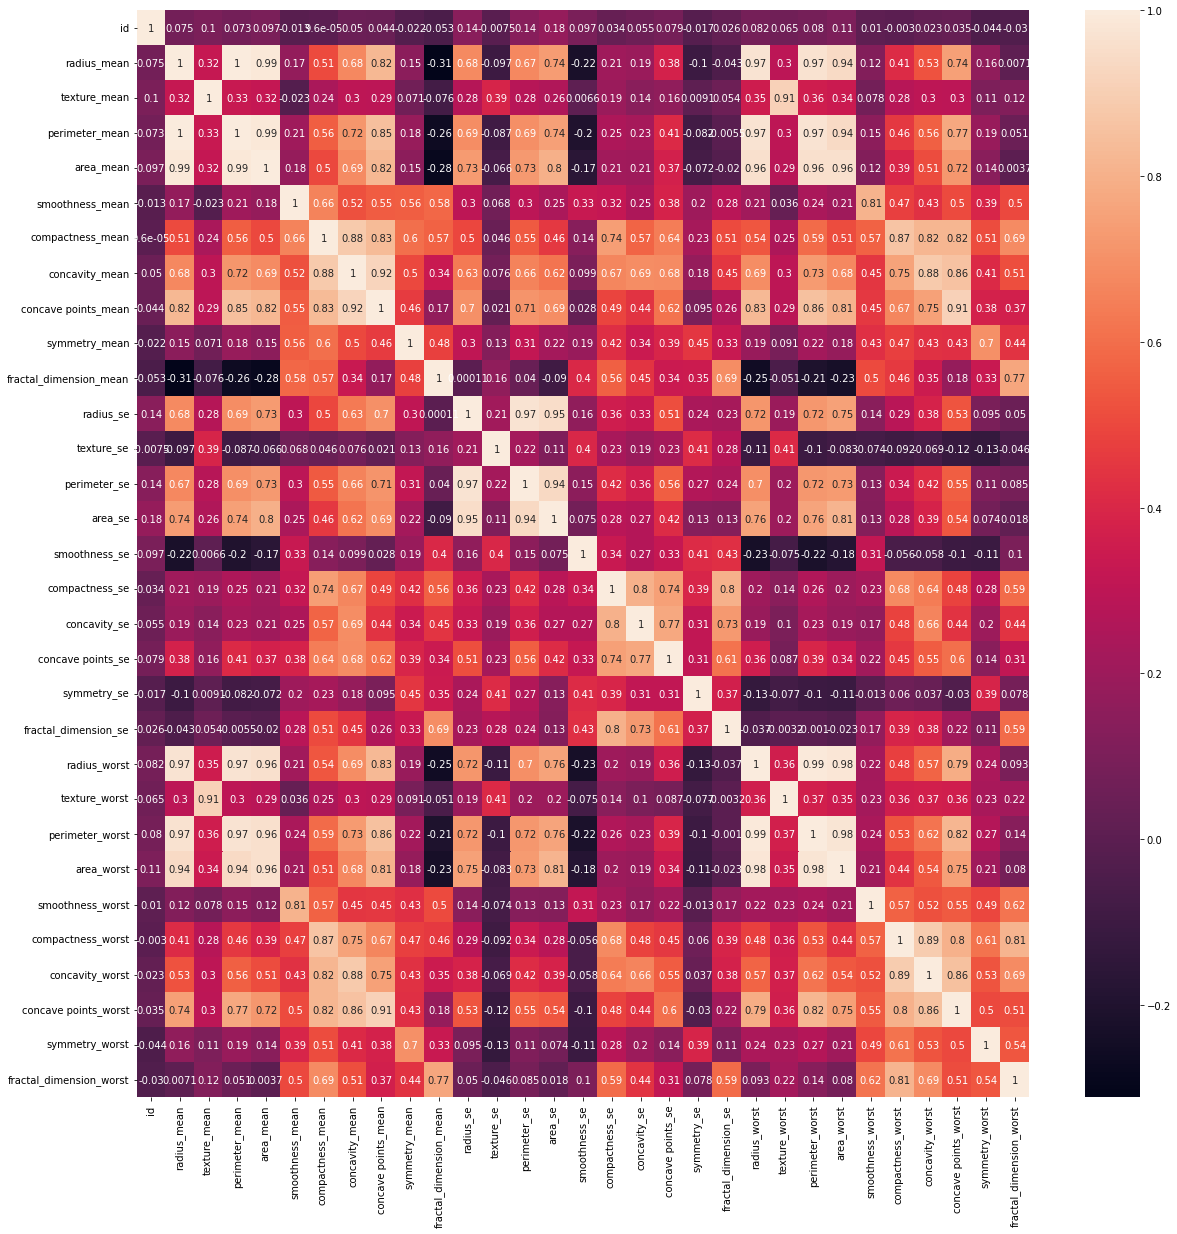

In [ ]:
#We will print the correlation matrix 
#It will help us understand more about the relation between different features
dataframe=pd.DataFrame(data)
corr_matrix=dataframe.corr()
plt.figure(figsize=(20,20))
sn.heatmap(corr_matrix, annot=True)
plt.show()

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

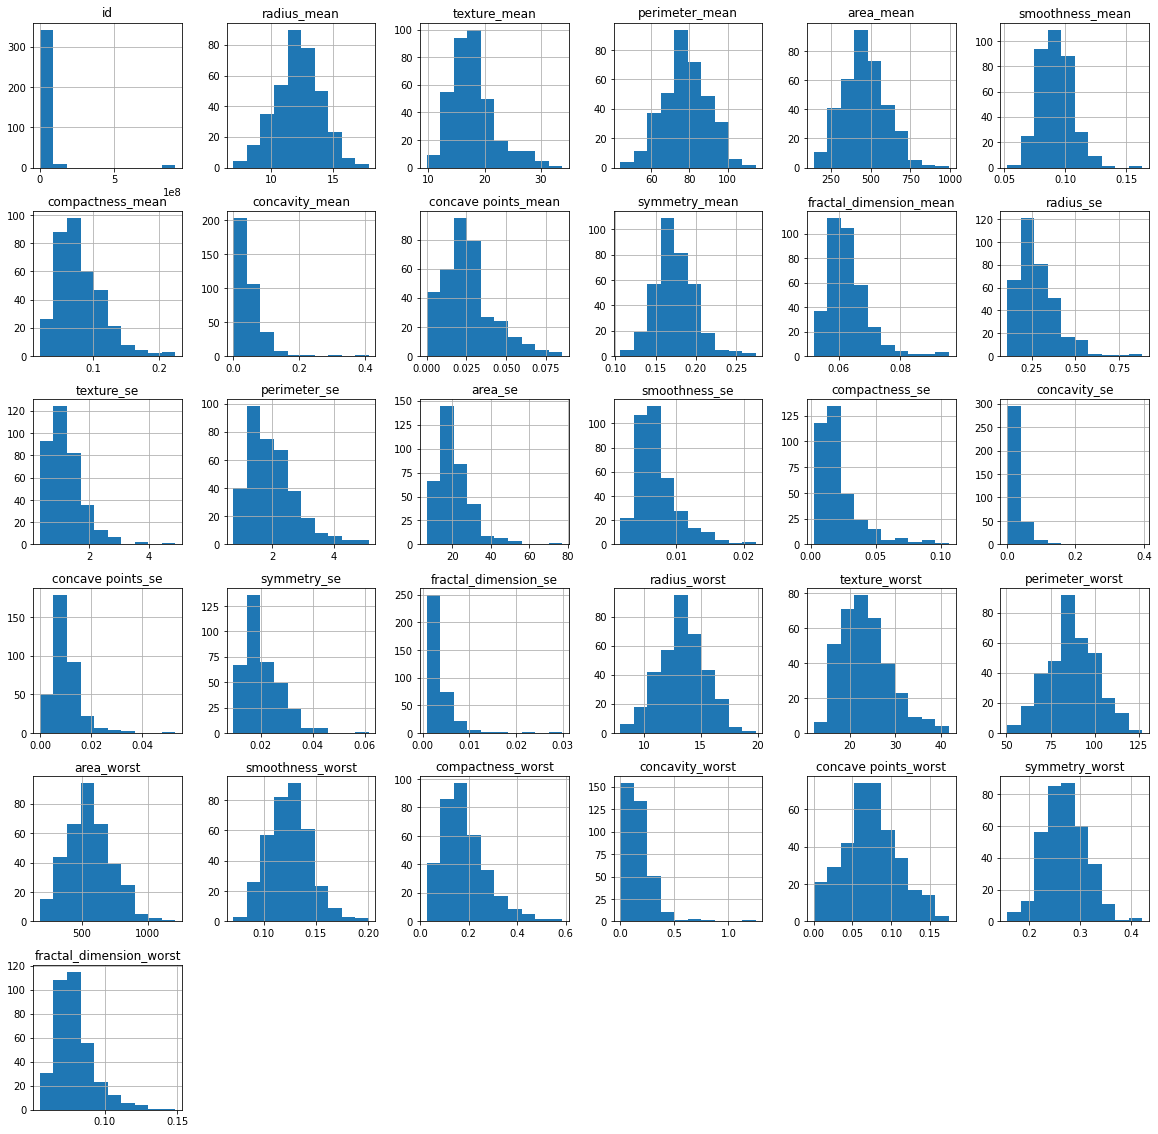

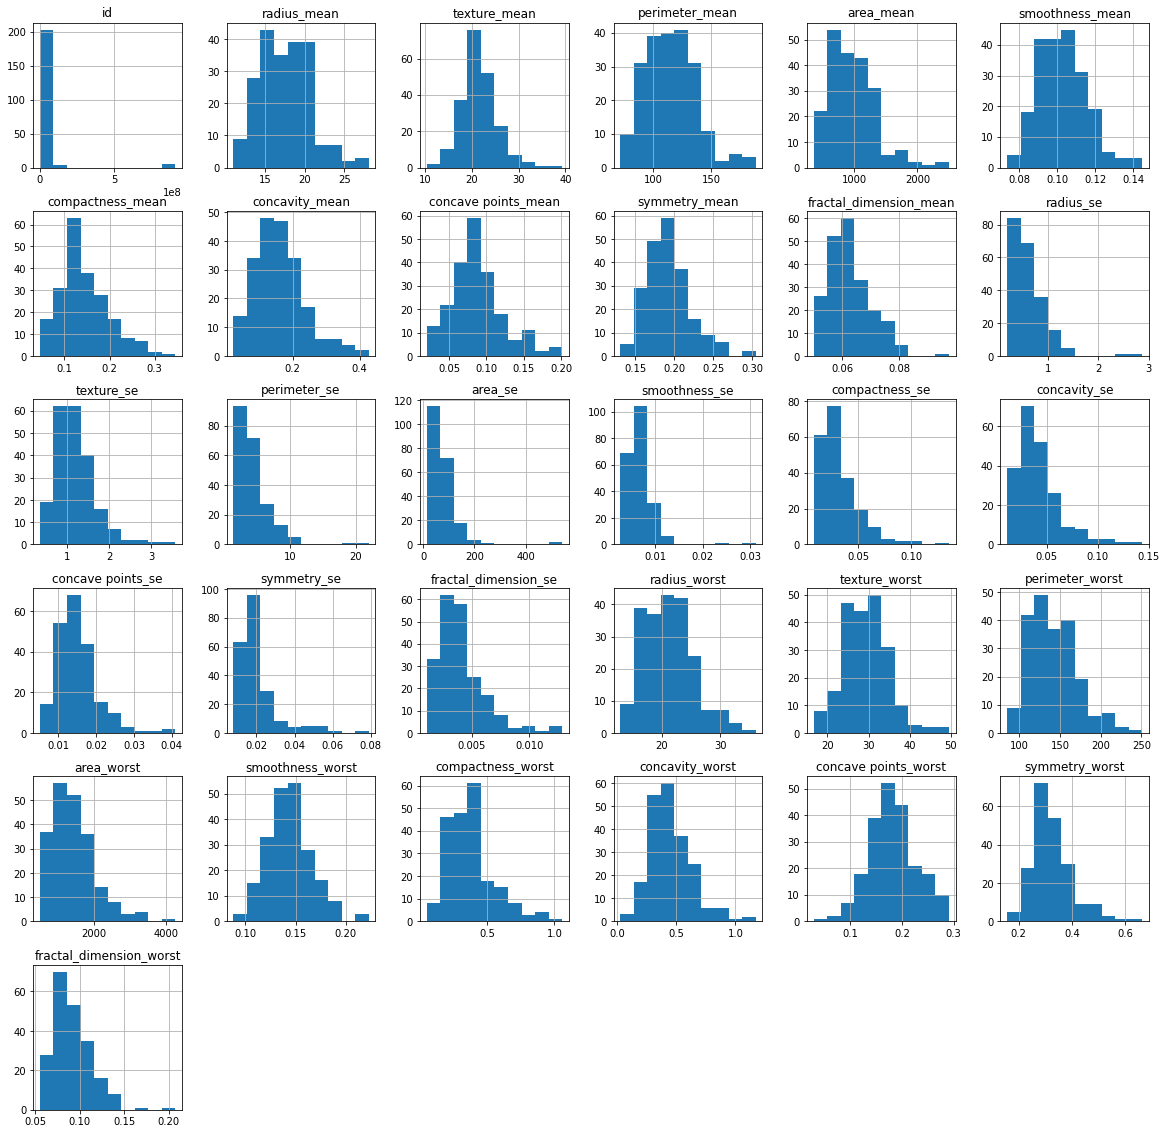

In [ ]:
#Data visualization
data.groupby('diagnosis').hist(figsize=(20, 20))

In [ ]:
#saving the data into input and output in X and Y arrays respectively
X = data.iloc[:,1:31].values
Y = data.iloc[:,31].values
#converting the dataset into dataframe with labels
df = pd.DataFrame(Y)

In [ ]:
#as the diagnosis is not numerical value (diagnosis is M or B)
#we need to convert into 1's and 0's using encoding
encoded_y = LabelEncoder()
Y = encoded_y.fit_transform(Y)

In [ ]:
#We will split the dataset into Training and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
#we select random_state=0 so that the training output remains the same everytime we run the code

In [ ]:
#we need to standardize the data feature values 
#i.e. we need the data normally distributed with gaussian mean and standard deviation as 0
# for that we need to do feature scaling
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

##As this is a classification problem, we will train on different classification models

### 1. Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,Y_train)
nb_pred = naive_bayes.predict(X_test)
accuracy = skm.accuracy_score(Y_test, nb_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, nb_pred)
print("Mean squared error =",rmse)

Accuracy = 91.6083916083916%
Mean squared error = 0.08391608391608392


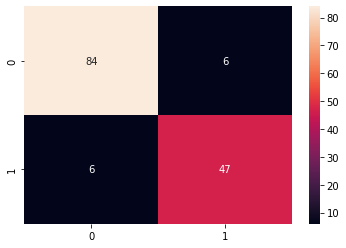

In [ ]:
conf_matrix=confusion_matrix(Y_test,nb_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###2. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train,Y_train)
svm_pred = svm.predict(X_test)
accuracy = skm.accuracy_score(Y_test, svm_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, svm_pred)
print("Mean squared error =",rmse)

Accuracy = 97.2027972027972%
Mean squared error = 0.027972027972027972


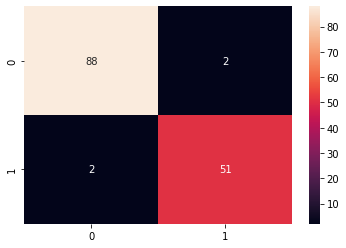

In [ ]:
conf_matrix=confusion_matrix(Y_test,svm_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###3. Kernal SVM

In [ ]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm.fit(X_train,Y_train)
ksvm_pred = ksvm.predict(X_test)
accuracy = skm.accuracy_score(Y_test, ksvm_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, ksvm_pred)
print("Mean squared error =",rmse)

Accuracy = 96.5034965034965%
Mean squared error = 0.03496503496503497


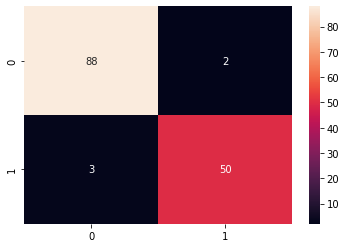

In [ ]:
conf_matrix=confusion_matrix(Y_test,ksvm_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###4. K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
accuracy = skm.accuracy_score(Y_test, knn_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, knn_pred)
print("Mean squared error =",rmse)

Accuracy = 95.1048951048951%
Mean squared error = 0.04895104895104895


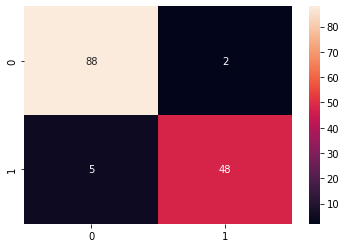

In [ ]:
conf_matrix=confusion_matrix(Y_test,knn_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###5. Decision tree algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(X_train,Y_train)
dtree_pred = dtree.predict(X_test)
accuracy = skm.accuracy_score(Y_test, dtree_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, dtree_pred)
print("Mean squared error =",rmse)

Accuracy = 95.8041958041958%
Mean squared error = 0.04195804195804196


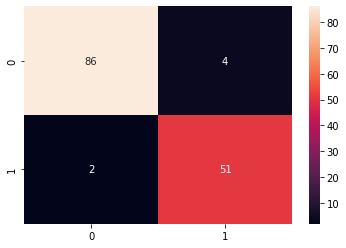

In [ ]:
conf_matrix=confusion_matrix(Y_test,dtree_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###6. Random Forest Algorithm

In [ ]:
import random
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
accuracy = skm.accuracy_score(Y_test, rf_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, rf_pred)
print("Mean squared error =",rmse)

Accuracy = 98.6013986013986%
Mean squared error = 0.013986013986013986


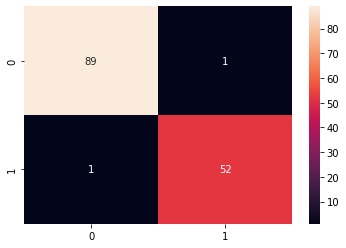

In [ ]:
conf_matrix=confusion_matrix(Y_test,rf_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###7. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state = 0)
lreg.fit(X_train, Y_train)
lreg_pred = lreg.predict(X_test)
accuracy = skm.accuracy_score(Y_test, lreg_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, lreg_pred)
print("Mean squared error =",rmse)

Accuracy = 95.8041958041958%
Mean squared error = 0.04195804195804196


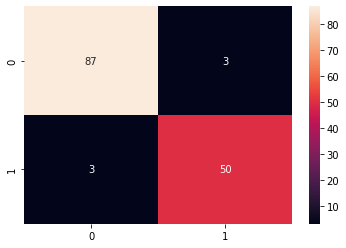

In [ ]:
conf_matrix=confusion_matrix(Y_test,lreg_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###8. Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver = 'sgd', activation = 'relu', learning_rate_init = 0.01, max_iter=1000, hidden_layer_sizes = 10, alpha = 1e-5, random_state=0)
mlp.fit(X_train,Y_train)
mlp_pred = mlp.predict(X_test)
accuracy = skm.accuracy_score(Y_test, mlp_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, mlp_pred)
print("Mean squared error =",rmse)

Accuracy = 97.2027972027972%
Mean squared error = 0.027972027972027972


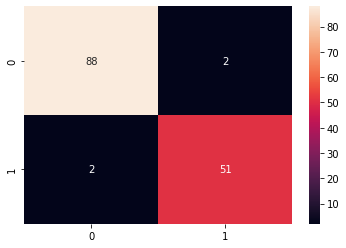

In [ ]:
conf_matrix=confusion_matrix(Y_test,mlp_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###9.Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=2, random_state=0)
gbdt.fit(X_train,Y_train)
gbdt_pred = gbdt.predict(X_test)
accuracy = skm.accuracy_score(Y_test, gbdt_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, gbdt_pred)
print("Mean squared error =",rmse)

Accuracy = 97.9020979020979%
Mean squared error = 0.02097902097902098


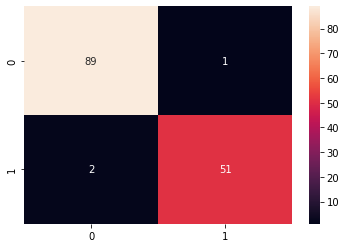

In [ ]:
conf_matrix=confusion_matrix(Y_test,gbdt_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()

###Combining the classifiers

In [ ]:
from sklearn.ensemble import StackingClassifier
l0=list()
l0.append(('naive_bayes', naive_bayes))
l0.append(('svm',svm))
l0.append(('knn',knn))
l0.append(('dtree',dtree))
l0.append(('rf',rf))
l0.append(('lreg',lreg))
l0.append(('mlp',mlp))
l0.append(('gbdt',gbdt))
com_model = StackingClassifier(estimators=l0, final_estimator=lreg, cv=8)
com_model.fit(X_train,Y_train)
com_pred = com_model.predict(X_test)
accuracy = skm.accuracy_score(Y_test, com_pred)
print("Accuracy = {}%".format(accuracy*100))
rmse = skm.mean_squared_error(Y_test, com_pred)
print("Mean squared error =",rmse)

Accuracy = 97.2027972027972%
Mean squared error = 0.027972027972027972


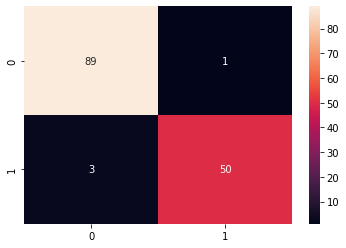

In [ ]:
conf_matrix=confusion_matrix(Y_test,com_pred)
sn.heatmap(conf_matrix, annot=True)
plt.show()